In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns

from sqlalchemy import create_engine, text

## Подключение к базе данных и загрузка таблиц sql

In [2]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [3]:
engine = create_engine(connection_string)
del db_config
del connection_string

## Проведение первичного исследования таблиц

In [4]:
query = '''
SELECT *
FROM collisions
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

case_id county_city_location county_location  distance direction  \
0  4083072                 1942     los angeles     528.0     north   
1  4083075                 4313     santa clara       0.0      None   
2  4083073                 0109         alameda       0.0      None   
3  4083077                 0109         alameda       0.0      None   
4  4083087                 4313     santa clara       0.0      None   
5  4083097                 0109         alameda       0.0      None   
6  4083092                 1942     los angeles    1320.0     south   
7  4083096                 1942     los angeles     200.0     south   
8  4083100                 1942     los angeles    2112.0     north   
9  4083103                 4313     santa clara       0.0      None   

   intersection weather_1 location_type collision_damage  party_count  \
0             0    cloudy       highway     small damage            2   
1             1     clear          None     small damage            1   
2             1     clear          None          scratch            2   
3             1     clear          None          scratch            2   
4             1     clear          None          scratch            2   
5             1     clear          ramp     small damage            2   
6             0     clear       highway          scratch            2   
7             0     clear       highway          scratch            3   
8             0    cloudy       highway          scratch            2   
9             1    cloudy          None          scratch            2   

  primary_collision_factor   pcf_violation_category type_of_collision  \
0   vehicle code violation       unsafe lane change         sideswipe   
1   vehicle code violation         improper passing        hit object   
2   vehicle code violation         improper turning         broadside   
3   vehicle code violation  automobile right of way         broadside   
4   vehicle code violation                 speeding          rear end   
5   vehicle code violation                 speeding          rear end   
6   vehicle code violation       unsafe lane change          rear end   
7   vehicle code violation                 speeding          rear end   
8   vehicle code violation                 speeding          rear end   
9   vehicle code violation                     None         broadside   

  motor_vehicle_involved_with road_surface road_condition_1  \
0         other motor vehicle          wet           normal   
1                fixed object          dry           normal   
2         other motor vehicle          dry           normal   
3         other motor vehicle          dry           normal   
4         other motor vehicle          dry             None   
5         other motor vehicle          dry           normal   
6         other motor vehicle          dry           normal   
7         other motor vehicle          dry           normal   
8         other motor vehicle          dry           normal   
9         other motor vehicle          wet           normal   

                  lighting control_device collision_date collision_time  
0                 daylight           none     2009-01-22       07:25:00  
1  dark with street lights    functioning     2009-01-03       02:26:00  
2  dark with street lights    functioning     2009-01-11       03:32:00  
3                 daylight    functioning     2009-01-11       10:35:00  
4  dark with street lights    functioning     2009-01-02       22:43:00  
5  dark with street lights    functioning     2009-01-18       02:18:00  
6                 daylight           none     2009-01-21       10:30:00  
7                 daylight           none     2009-01-21       08:55:00  
8                 daylight           none     2009-01-21       16:20:00  
9             dusk or dawn    functioning     2009-01-02       15:55:00

In [5]:
query = '''
SELECT *
FROM case_ids
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

case_id db_year
0  0081715    2021
1  0726202    2021
2  3858022    2021
3  3899441    2021
4  3899442    2021
5  3899445    2021
6  3899446    2021
7  3899449    2021
8  3899450    2021
9  3899453    2021

In [6]:
query = '''
SELECT *
FROM vehicles
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

id  case_id  party_number vehicle_type vehicle_transmission  \
0  1175713  5305032             2        sedan               manual   
1        1  3858022             1        sedan                 auto   
2  1175712  5305030             1        sedan                 auto   
3  1175717  5305033             3        sedan                 auto   
4  1175722  5305034             2        sedan                 auto   
5  1175737  5305046             2        sedan                 auto   
6  1175750  5305053             3        sedan                 auto   
7  1175715  5305033             1        sedan               manual   
8  1175716  5305033             2        sedan               manual   
9  1175758  5305060             2        sedan                 auto   

   vehicle_age  
0            3  
1            3  
2            3  
3            5  
4            5  
5            5  
6            9  
7           10  
8            4  
9           11

In [7]:
query = '''
SELECT *
FROM parties
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

id  case_id  party_number   party_type  at_fault  insurance_premium  \
0  22  3899454             1   road signs         1               29.0   
1  23  3899454             2   road signs         0                7.0   
2  29  3899462             2          car         0               21.0   
3  31  3899465             2   road signs         0               24.0   
4  41  3899478             2  road bumper         0                NaN   
5  43  3899481             2  road bumper         0                NaN   
6  72  3899505             2  road bumper         0                NaN   
7  73  3899505             3  road bumper         0                NaN   
8  76  3899509             1  road bumper         0                NaN   
9  93  3981292             2  road bumper         0                NaN   

          party_sobriety party_drug_physical  cellphone_in_use  
0  had not been drinking                None               0.0  
1  had not been drinking                None               0.0  
2  had not been drinking                None               0.0  
3  had not been drinking                None               0.0  
4         not applicable      not applicable               0.0  
5         not applicable      not applicable               0.0  
6         not applicable      not applicable               0.0  
7         not applicable      not applicable               0.0  
8  had not been drinking                None               0.0  
9  had not been drinking                None               NaN

### Выводы
1. Все таблицы имеют данные для выполнения поставленных задач
2. Таблиц достаточно для выполнения поставленных задач
3. Все таблицы имеют общий ключ для связи между собой

##  Проведение статистического анализа факторов ДТП

In [8]:
query = '''
SELECT extract(month from collision_date) as month, count(*)
FROM collisions
GROUP BY month
ORDER BY month;
'''

collisions_per_month = pd.DataFrame(engine.connect().execute(text(query)))

In [9]:
collisions_per_month

month   count
0      1  132044
1      2  128858
2      3  139581
3      4  130180
4      5  130316
5      6  102594
6      7  102227
7      8  104089
8      9  105159
9     10  112237
10    11  104770
11    12  107945

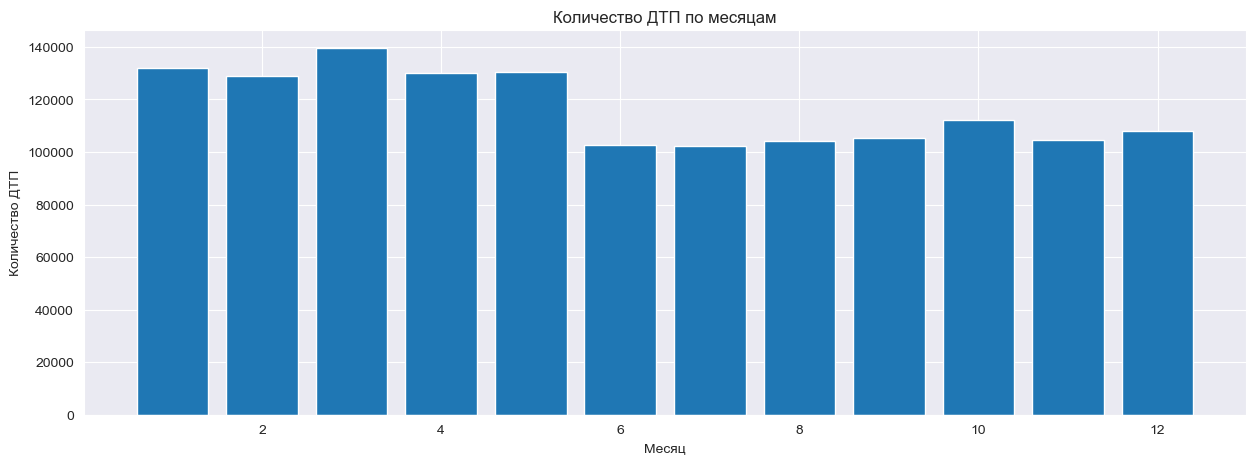

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.bar(collisions_per_month['month'], collisions_per_month['count'])
plt.title('Количество ДТП по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество ДТП')
plt.show()

### Количество ДТП по месяцам
* С января по май включительно самое большое количество аварий, примерно в одном диапозоне.
* Март является самым аварийным месяцем.
* С июня по декабрь включительно количество аварий примерно одинаковое и меньше, чем в первой половине года.
* Самое маленькое количество аварий в июле.

### Список задач для статистического анализа
1. Проведите анализ серьёзности повреждений транспортного средства, исходя из тип кузова авто (связать collisions и vehicles)
2. Определите количество ДТП для разных видов коробок передач при разной погоде (связать collisions и vehicles)
3. Определите среднее количество участников ДТП для каждого из типов дорог (связать collisions и parties)
4. Определите, какая степень трезвости участника встречается чаще всего в каждом из районов (связать collisions и parties)
5. Определить зависимость между расстоянием от главной дороги и типом кузова авто (связать collisions и vehicles)

    5.1. Объедините таблицы collisions и vehicles

    5.2. Переведите расстояние в километры, округлите до целого числа

    5.3. Найдите самый популярный тип кузова авто для каждого 5го километра, например: 0-5, 5-10, 10-15 и т.д.

    5.4. Постройте график
    
    5.5. Сделайте вывод
    
6. Определите среднее количество участников ДТП для каждого из типов кузова авто (связать vehicles и parties)

    6.1. Объедините таблицы vehicles и parties

    6.2. Найдите среднее значение участников ДТП

    6.3. Сгрупируйте данные по типу кузова авто

    6.4. Постройте график
    
    6.5. Сделайте вывод

## Создание модели для оценки водительского риска

### Собираем требуемые данные из баззы данных

In [11]:
query = '''
with fault as (
    SELECT case_id
    FROM parties
    where at_fault = 1
    and party_type = 'car'
), final_filter as (
    select case_id
    from collisions
    where collision_damage != 'scratch'
    and extract(year from collision_date) = 2012
    and case_id in (select * from fault)
)

select *
from vehicles
where case_id in (select case_id from final_filter);
'''

vehicles_df = pd.DataFrame(engine.connect().execute(text(query)))

In [12]:
query = '''
with fault as (
    SELECT case_id
    FROM parties
    where at_fault = 1
    and party_type = 'car'
), final_filter as (
    select case_id
    from collisions
    where collision_damage != 'scratch'
    and extract(year from collision_date) = 2012
    and case_id in (select case_id from fault)
)

select *
from collisions
where case_id in (select case_id from final_filter);
'''

collisions_df = pd.DataFrame(engine.connect().execute(text(query)))

In [13]:
query = '''
with fault as (
    SELECT case_id
    FROM parties
    where at_fault = 1
    and party_type = 'car'
), final_filter as (
    select case_id
    from collisions
    where collision_damage != 'scratch'
    and extract(year from collision_date) = 2012
    and case_id in (select * from fault)
)

select *
from parties
where case_id in (select case_id from final_filter);
'''

parties_df = pd.DataFrame(engine.connect().execute(text(query)))

### Подбираем данные для модели

In [14]:
vehicles_df

id  case_id  party_number vehicle_type vehicle_transmission  \
0      1463705  5599671             2        sedan                 auto   
1      1463709  5599677             2        sedan                 auto   
2      1463710  5599681             1        sedan                 auto   
3      1463713  5599684             2        sedan                 auto   
4      1463718  5599698             2        sedan                 auto   
...        ...      ...           ...          ...                  ...   
55611  1517526  5668218             4        coupe                 auto   
55612  1517546  5668232             2        coupe                 auto   
55613  1517547  5668233             1        coupe                 auto   
55614  1517543  5668231             1        coupe               manual   
55615  1517589  5668265             1        coupe                 auto   

       vehicle_age  
0              3.0  
1              NaN  
2              0.0  
3              2.0  
4              7.0  
...            ...  
55611          3.0  
55612          6.0  
55613          6.0  
55614         10.0  
55615          4.0  

[55616 rows x 6 columns]

In [15]:
vehicles_df = vehicles_df[['case_id', # Требуется для объединения таблиц
                           'party_number', # Требуется для объединения таблиц
                           'vehicle_type', # Тип кузова влияет на характеристики автомобиля тем самым и на возможность аварии, ее последстия и другое
                           'vehicle_transmission', # Тип КПП влияет на воздействие человека на автомобиль тем самым и на возможность аварии
                           'vehicle_age']] # Возраст автомобиля влияет на его техническое состояние, что влияет на возможность аварии

In [16]:
collisions_df

case_id county_city_location county_location  distance direction  \
0       5125192                 4312     santa clara      30.0     south   
1       5448258                 1942     los angeles      48.0      west   
2       5403121                 1919     los angeles     111.0      east   
3       5403123                 3900     san joaquin       0.0      None   
4       5403124                 3100          placer    3168.0     north   
...         ...                  ...             ...       ...       ...   
103042  5663337                 1942     los angeles       7.0      west   
103043  5663388                 1942     los angeles      15.0      west   
103044  5664211                 4109       san mateo       0.0      None   
103045  5664762                 1942     los angeles     420.0      west   
103046  5664802                 5001      stanislaus       0.0      None   

        intersection weather_1 location_type collision_damage  party_count  \
0                0.0    cloudy          None     small damage            2   
1                0.0     clear          None     small damage            1   
2                0.0     clear       highway            fatal            1   
3                1.0     clear          None            fatal            2   
4                0.0     clear       highway            fatal            2   
...              ...       ...           ...              ...          ...   
103042           0.0     clear          None    middle damage            2   
103043           0.0     clear          None    middle damage            2   
103044           1.0     clear          None    middle damage            2   
103045           0.0     clear          None    middle damage            2   
103046           1.0     clear          None    middle damage            2   

       primary_collision_factor      pcf_violation_category type_of_collision  \
0        vehicle code violation  unsafe starting or backing             other   
1        vehicle code violation                    speeding        hit object   
2        vehicle code violation            improper turning        hit object   
3        vehicle code violation   traffic signals and signs         broadside   
4        vehicle code violation          wrong side of road           head-on   
...                         ...                         ...               ...   
103042   vehicle code violation     pedestrian right of way             other   
103043   vehicle code violation     pedestrian right of way             other   
103044   vehicle code violation            improper turning             other   
103045   vehicle code violation  unsafe starting or backing             other   
103046   vehicle code violation     automobile right of way             other   

       motor_vehicle_involved_with road_surface road_condition_1  \
0             parked motor vehicle          dry           normal   
1                     fixed object          dry           normal   
2                     other object          dry           normal   
3              other motor vehicle          dry           normal   
4              other motor vehicle          dry           normal   
...                            ...          ...              ...   
103042                other object          dry           normal   
103043                other object          dry           normal   
103044                other object          dry           normal   
103045                other object          dry           normal   
103046                other object         None           normal   

                          lighting control_device collision_date  \
0                         daylight    functioning     2012-03-16   
1          dark with street lights           none     2012-01-09   
2                         daylight           none     2012-01-05   
3                         daylight           none     2012-01-07   
4       dark with no street 

In [17]:
collisions_df = collisions_df[['case_id', # Требуется для объединения таблиц
                               'county_city_location', # Разные города имеют разные дороги, что влияет на возможность аварии
                               'distance', # Расстояние от главной дороги может влиять на качество дороги, что влияет на возможность аварии
                               'direction', # Не известно как может направление движения влиять на возможность аварии, стоит проверить
                               'intersection', # Сложный перекресток может влиять на принятие решения человеком
                               'weather_1', # Погода создает определенные условия для вождения
                               'location_type', # Тип дороги влияет на скорость движения и восприятия пути человеком
                               'primary_collision_factor', # Неправильные действия при вождении увеличивают вероятность аварии
                               'pcf_violation_category', # Неправильные действия при вождении увеличивают вероятность аварии
                               'road_surface', # Дорожное покрытие влияет на поведение автомобиля
                               'road_condition_1', # Состояние дороги влияет на поведение автомобиля
                               'lighting', # Освещение влияет на видимость дороги и других автомобилей
                               'collision_date',# Возьмем месяц аварии. Мы узнали, что в первой половине года аварий больше
                               'collision_time']] # Возьмем час аварии для упрощения признака

In [18]:
parties_df

id  case_id  party_number   party_type  at_fault  \
0       2469249  5488558             2  road bumper         0   
1       2469250  5488558             3  road bumper         0   
2       2656298  5599118             3  road bumper         0   
3       2473241  5490711             3  road bumper         0   
4       2469251  5488558             4  road bumper         0   
...         ...      ...           ...          ...       ...   
198476  2405042  5454071             3          car         0   
198477  2405049  5454074             1          car         1   
198478  2405056  5454077             1          car         1   
198479  2405057  5454077             2          car         0   
198480  2405058  5454078             1          car         1   

        insurance_premium                      party_sobriety  \
0                     NaN                                None   
1                     NaN                                None   
2                     NaN                                None   
3                     NaN                                None   
4                     NaN                                None   
...                   ...                                 ...   
198476               39.0               had not been drinking   
198477                NaN                  impairment unknown   
198478               24.0  had been drinking, under influence   
198479               59.0               had not been drinking   
198480               27.0               had not been drinking   

       party_drug_physical  cellphone_in_use  
0                     None               NaN  
1                     None               NaN  
2                     None               NaN  
3                     None               NaN  
4                     None               NaN  
...                    ...               ...  
198476                None               0.0  
198477                   G               0.0  
198478                None               0.0  
198479                None               0.0  
198480                None               0.0  

[198481 rows x 9 columns]

In [19]:
parties_df = parties_df[['case_id', # Требуется для объединения таблиц
                         'party_number', # Требуется для объединения таблиц
                         'at_fault', # Целевая переменная
                         'insurance_premium', # Стоимость страховки может влиять на качество вождения
                         'party_sobriety', # Состояние водителя влияет на качество вождения
                         'party_drug_physical', # Состояние водителя влияет на качество вождения
                         'cellphone_in_use']]   # Мобильное устройство может отвлекать водителя

### Формируем полную таблицу для модели и проводим анализ

In [20]:
parties_vehicles_df = parties_df.merge(vehicles_df, on=['case_id', 'party_number'], how='left')
df = parties_vehicles_df.merge(collisions_df, on='case_id', how='left')
df.shape

(198481, 23)

In [21]:
df

case_id  party_number  at_fault  insurance_premium  \
0       5488558             2         0                NaN   
1       5488558             3         0                NaN   
2       5599118             3         0                NaN   
3       5490711             3         0                NaN   
4       5488558             4         0                NaN   
...         ...           ...       ...                ...   
198476  5454071             3         0               39.0   
198477  5454074             1         1                NaN   
198478  5454077             1         1               24.0   
198479  5454077             2         0               59.0   
198480  5454078             1         1               27.0   

                            party_sobriety party_drug_physical  \
0                                     None                None   
1                                     None                None   
2                                     None                None   
3                                     None                None   
4                                     None                None   
...                                    ...                 ...   
198476               had not been drinking                None   
198477                  impairment unknown                   G   
198478  had been drinking, under influence                None   
198479               had not been drinking                None   
198480               had not been drinking                None   

        cellphone_in_use vehicle_type vehicle_transmission  vehicle_age  ...  \
0                    NaN          NaN                  NaN          NaN  ...   
1                    NaN          NaN                  NaN          NaN  ...   
2                    NaN          NaN                  NaN          NaN  ...   
3                    NaN          NaN                  NaN          NaN  ...   
4                    NaN          NaN                  NaN          NaN  ...   
...                  ...          ...                  ...          ...  ...   
198476               0.0          NaN                  NaN          NaN  ...   
198477               0.0          NaN                  NaN          NaN  ...   
198478               0.0          NaN                  NaN          NaN  ...   
198479               0.0          NaN                  NaN          NaN  ...   
198480               0.0        sedan               manual          1.0  ...   

       intersection  weather_1 location_type  primary_collision_factor  \
0               0.0      clear          None    vehicle code violation   
1               0.0      clear          None    vehicle code violation   
2               0.0      clear          None    vehicle code violation   
3               0.0      clear          None    vehicle code violation   
4               0.0      clear          None    vehicle code violation   
...             ...        ...           ...                       ...   
198476          0.0      clear       highway    vehicle code violation   
198477          0.0      clear          None    vehicle code violation   
198478          0.0      clear       highway    vehicle code violation   
198479          0.0      clear       highway    vehicle code violation   
198480          0.0      clear          None    vehicle code violation   

            pcf_violation_category road_surface road_condition_1  \
0                         speeding          dry           normal   
1                         speeding          dry           normal   
2                              dui          dry           normal   
3                 improper turning          dry           normal   
4                         speeding          dry           normal   
...                            ...          ...              ...   
198476                    speeding          dry           normal   
198477  unsafe starting or backing          dry           normal   
198478  

### Предобработка признаков

In [22]:
cat_column = []
num_column = []

Данные для создания таблиц

In [23]:
df.drop(['case_id', 'party_number'], axis=1, inplace=True)

at_fault

In [24]:
df['at_fault'] = df['at_fault'].astype('bool')
cat_column.append('at_fault')

insurance_premium

In [25]:
df['insurance_premium'] = df['insurance_premium'].fillna(0)
num_column.append('insurance_premium')

party_sobriety

In [26]:
df['party_sobriety'] = df['party_sobriety'].fillna('had not been drinking')
cat_column.append('party_sobriety')

party_drug_physical

In [27]:
df['party_drug_physical'] = df['party_drug_physical'].fillna('no drugs')
cat_column.append('party_drug_physical')

cellphone_in_use

In [28]:
df['cellphone_in_use'] = df['cellphone_in_use'].fillna(0)
df['cellphone_in_use'] = df['cellphone_in_use'].astype('bool')
cat_column.append('cellphone_in_use')

vehicle_type

In [29]:
df['vehicle_type'] = df['vehicle_type'].fillna('not applicable')
cat_column.append('vehicle_type')

vehicle_transmission

In [30]:
df['vehicle_transmission'] = df['vehicle_transmission'].fillna('not applicable')
cat_column.append('vehicle_transmission')

vehicle_age

In [31]:
df['vehicle_age'] = df['vehicle_age'].fillna(0)
num_column.append('vehicle_age')

county_city_location

In [32]:
num_column.append('county_city_location')

distance

In [33]:
num_column.append('distance')

direction

In [34]:
df['direction'] = df['direction'].fillna('unknown')
cat_column.append('direction')

intersection

In [35]:
df['intersection'] = df['intersection'].fillna(0)
df['intersection'] = df['intersection'].astype('bool')
cat_column.append('intersection')

weather_1

In [36]:
df['weather_1'] = df['weather_1'].fillna('unknown')
cat_column.append('weather_1')

location_type

In [37]:
df['location_type'] = df['location_type'].fillna('road')
cat_column.append('location_type')

primary_collision_factor

In [38]:
cat_column.append('primary_collision_factor')

pcf_violation_category

In [39]:
df['pcf_violation_category'] = df['pcf_violation_category'].fillna('unknown')
cat_column.append('pcf_violation_category')

road_surface

In [40]:
df['road_surface'] = df['road_surface'].fillna('dry')
cat_column.append('road_surface')

road_condition_1

In [41]:
df['road_condition_1'] = df['road_condition_1'].fillna('normal')
cat_column.append('road_condition_1')

lighting

In [42]:
df['lighting'] = df['lighting'].fillna('daylight')
cat_column.append('lighting')

collision_date

In [43]:
df['collision_date'] = pd.to_datetime(df['collision_date'])
df['month'] = df['collision_date'].dt.month
df.drop('collision_date', axis=1, inplace=True)
cat_column.append('month')

collision_time

In [44]:
df['collision_time'] = df['collision_time'].fillna('00')
df['collision_time'] = df['collision_time'].apply(lambda x: str(x)[:2]).astype(int)
df['collision_time'] = df['collision_time'].astype('int')
cat_column.append('collision_time')

In [45]:
len(num_column), len(cat_column)

(4, 17)

In [46]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [47]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
profile.to_file('car_accidents_analysis.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
df.to_csv('df.csv', index=False)

## Проведение анализ важности факторов ДТП

## Выводы